In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replaced blank values in the Tenure column with 0, as they indicate no service usage, and converted the TotalCharges column to float data type.

In [3]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df["customerID"].duplicated().sum()

0

# Converted the 0 and 1 of SeniorCitizen to Yes/No to make it easier to understand

In [8]:
def conv(value):
    if value == 1:
        return "Yes"
    else :
        return "No"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)
    

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


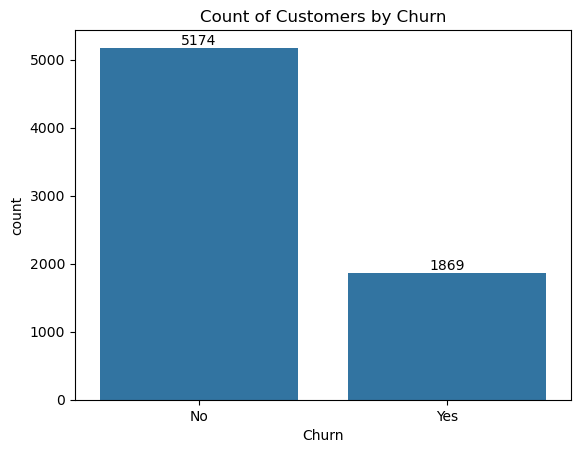

In [10]:
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

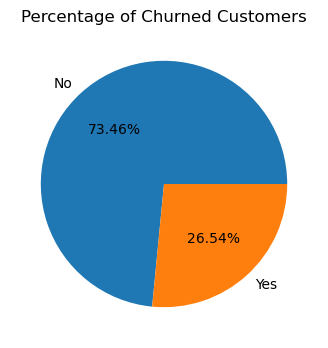

In [11]:
plt.figure(figsize = (4,4))
gb = df.groupby("Churn").agg({'Churn' : "count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = '%1.2f%%')
plt.title("Percentage of Churned Customers", fontsize = 12)
plt.show()

#From the Pie Chart we can conclude that 26.54% of our customers have churned out.


#Exploring the reason behind it.

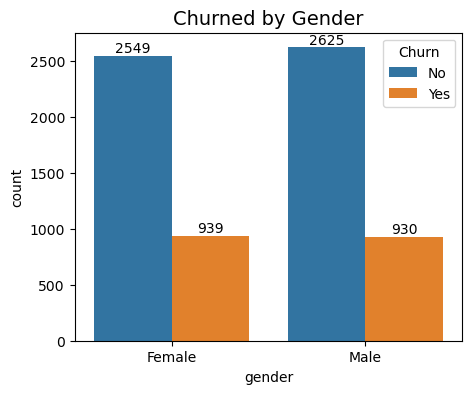

In [12]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x = 'gender', data = df, hue = 'Churn')
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Churned by Gender", fontsize = 14)
plt.show()

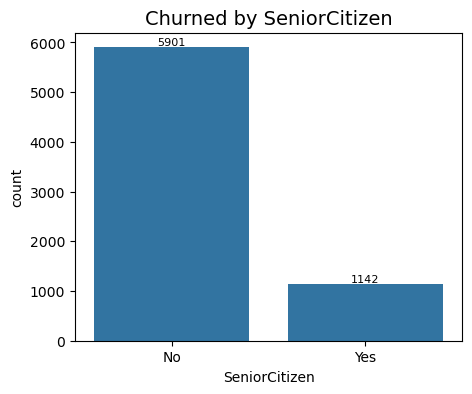

In [13]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x = 'SeniorCitizen', data = df)
ax.bar_label(ax.containers[0],fontsize = 8)
plt.title("Churned by SeniorCitizen", fontsize = 14)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1480\1503815096.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(j,bottom[j] + val/2,f'{val:.1f}%',ha='center', va='center', color='white', fontsize=10)


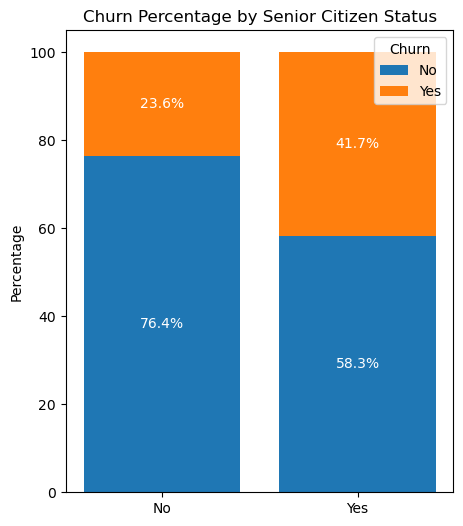

In [14]:
counts = df.groupby(['SeniorCitizen','Churn']).size().unstack(fill_value = 0)
percentages = counts.div(counts.sum(axis = 1), axis = 0)* 100
fig,ax = plt.subplots(figsize = (5,6))
bottom = np.zeros(len(percentages))
colors = ['#1f77b4', '#ff7f0e']
for i, churn_status in enumerate(percentages.columns):
    ax.bar(percentages.index,percentages[churn_status],bottom = bottom,label = churn_status,color = colors[i])
    for j,val in enumerate(percentages[churn_status]):
        if val > 0:
             ax.text(j,bottom[j] + val/2,f'{val:.1f}%',ha='center', va='center', color='white', fontsize=10)
    bottom += percentages[churn_status]
ax.set_ylabel('Percentage')
ax.set_title('Churn Percentage by Senior Citizen Status')
ax.legend(title='Churn')
plt.show()

#comparatively the greater number of Senior Citizens have churned.

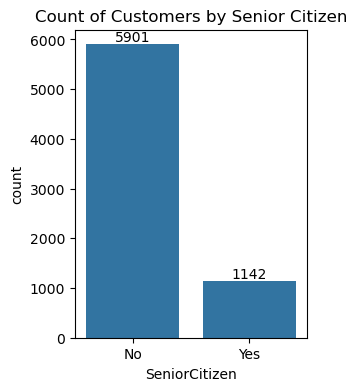

In [15]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x = 'SeniorCitizen', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

#A significantly higher percentage of senior citizen customers have churned compared to non-senior citizens.

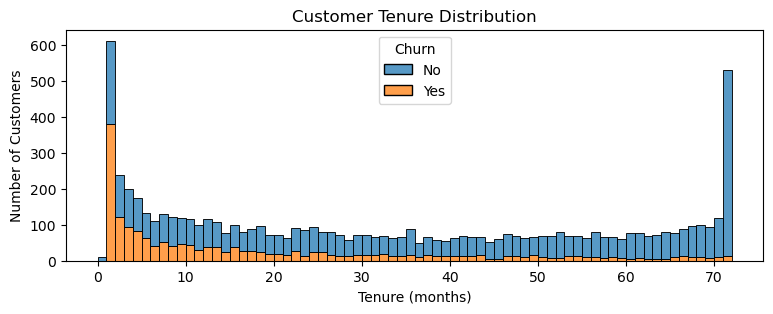

In [16]:
plt.figure(figsize = (9,3))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn", multiple="stack")
plt.title("Customer Tenure Distribution")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()

#Customers with longer tenure tend to stay with the company, while those who have used the service for only a few months are more likely to churn.

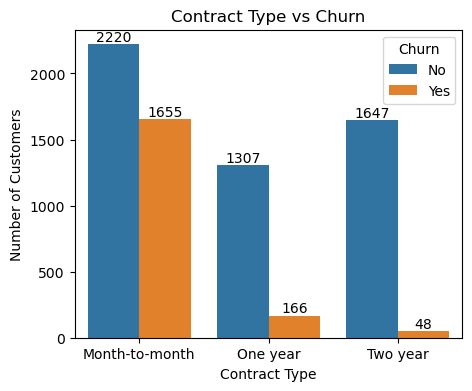

In [17]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x = "Contract", data = df, hue = 'Churn')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Contract Type vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.show()

#Customers with month-to-month contracts are more likely to churn compared to those with 1-year or 2-year contracts, indicating that longer-term contracts contribute to higher customer retention.

In [18]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

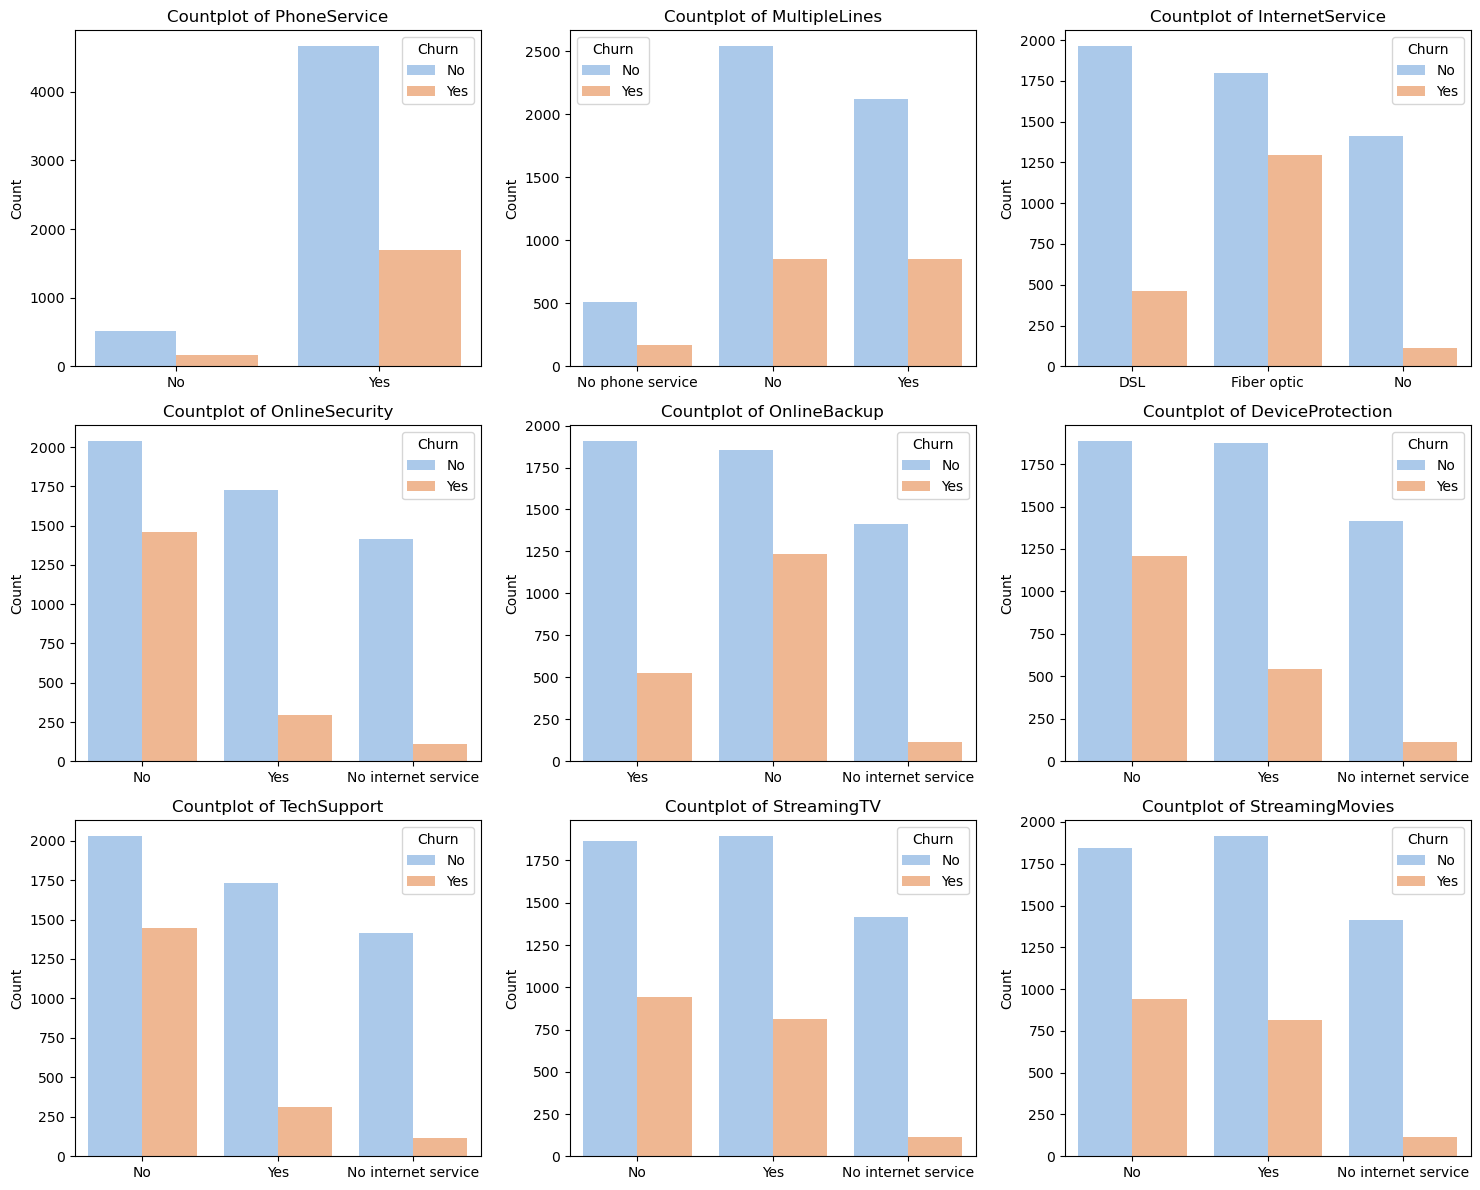

In [19]:
service_cols = ['PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']
rows = 3
cols = 3
plt.figure(figsize = (15,12))
for i,col in enumerate(service_cols):
    plt.subplot(rows,cols,i+1)
    sns.countplot(x = col, data = df, hue = 'Churn', palette = 'pastel')
    plt.title(f'Countplot of {col}')
    plt.xlabel('')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()



#The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and Streaming TV, churn rates are noticeably higher when these services are not used or are unavailable.


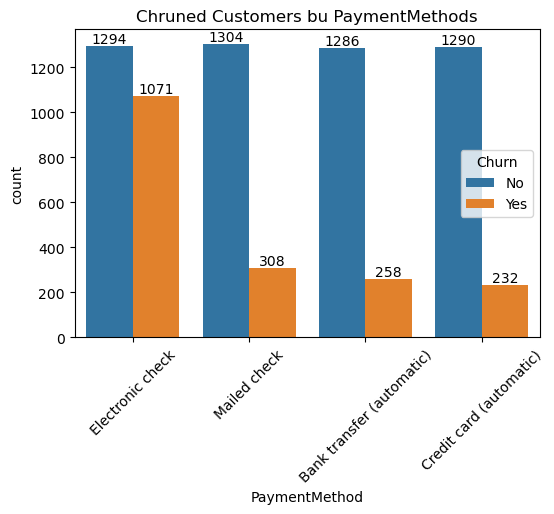

In [20]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Chruned Customers bu PaymentMethods")
plt.xticks(rotation = 45)
plt.show()

#Customer is likely to churn when he is using the payment method as "Electronic Check".

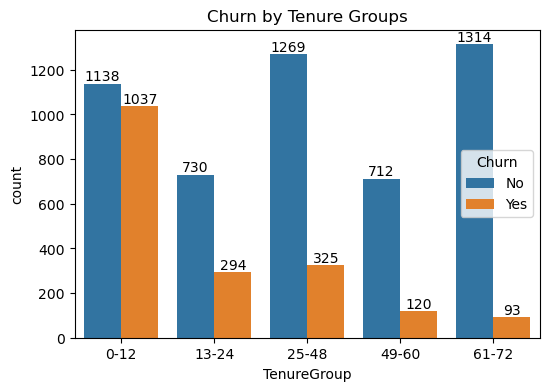

In [32]:
bins = [0, 12, 24, 48, 60, 72]
labels = ['0-12', '13-24', '25-48', '49-60', '61-72']
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels)

plt.figure(figsize=(6,4))
ax = sns.countplot(x='TenureGroup', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Tenure Groups")
plt.show()


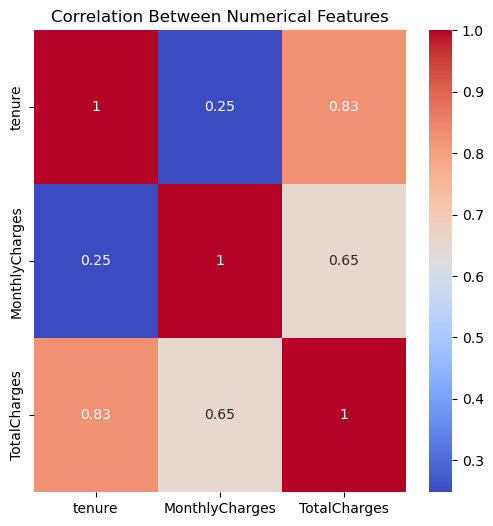

In [33]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(6,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()


In [26]:
risk_customers = df[
    (df['Contract'] == 'Month-to-month') &
    (df['OnlineSecurity'] == 'No') &
    (df['TechSupport'] == 'No') &
    (df['MonthlyCharges'] > df['MonthlyCharges'].mean())
]
print("High-risk customer count:", len(risk_customers))


High-risk customer count: 1552
